## Assignment

You will be asked to work with NOAA climate data: <a href="https://www.esrl.noaa.gov/psd/boulder/Boulder.mm.html" target="_blank">temperature</a> and <a href="https://www.esrl.noaa.gov/psd/boulder/Boulder.mm.precip.html" target="_blank">precipitation</a> for various months and years of data for  Boulder, Colorado, provided by the U.S. National Oceanic and Atmospheric Administration (NOAA).

In your home directory, you will need a subdirectory called `earth-analytics-bootcamp` that has a subdirectory called `data`. 

### Question 1: Import Python Packages

In the questions below, you will need to import the necessary `Python` packages to accomplish the following tasks: 

1. Set your working directory to `earth-analytics-bootcamp` in your home directory.
2. Download a CSV file using `urllib.request`.
3. Import data into `pandas dataframes`.
4. Creating plots of your data using `matplotlib`.

In [1]:
# Import necessary Python packages

# BEGIN SOLUTION
import os
import urllib.request
import matplotlib.pyplot as plt
import pandas as pd
import earthpy as et

# END SOLUTION

### DO NOT REMOVE LINES BELOW ###
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts

### Question 2: Download Data and Plot

Set your working directory to `earth-analytics-bootcamp` and use `.urllib.request` to download the following .csv file to your `data` subdirectory:

* `boulder-precip-2007-to-2017-months-seasons.csv` from `https://ndownloader.figshare.com/files/12767933`
    * This dataset contains a row for each month (starting with January through December) and contains a column for each year (2007 to 2017). 
    
Import the data to a `pandas dataframe` and create a line plot for **2013** using `matplotlib`. 

Be sure to include:
1. An appropriate plot title.
2. Clear labels for the axes (including abbreviation for units of measurements where apppropriate).

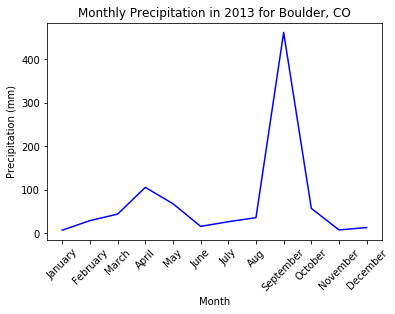

In [2]:
# Create plot for 2013

# BEGIN SOLUTION

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics-bootcamp'))

# Download the monthly average precipitation values
urllib.request.urlretrieve(url = "https://ndownloader.figshare.com/files/12767933", 
                           filename = "data/boulder-precip-2007-to-2017-months-seasons.csv")

# Import to pandas dataframe
precip_2007_to_2017_months = pd.read_csv("data/boulder-precip-2007-to-2017-months-seasons.csv")
#precip_2013 = precip_2007_to_2017_months[["months", "y2013"]]

fig, ax = plt.subplots()

# Add the x-axis and the y-axis to the plot
#ax.plot(precip_2007_to_2017_months["months"], precip_2007_to_2017_months["y2013"], color="blue")
ax.plot(precip_2007_to_2017_months.months, precip_2007_to_2017_months.y2013, color="blue")

# Set plot title
ax.set(title="Monthly Precipitation in 2013 for Boulder, CO")

# Add labels to the axes
ax.set(xlabel="Month", ylabel="Precipitation (mm)")
    
# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45);

# END SOLUTION

### DO NOT REMOVE LINE BELOW ###
ts_1_plot = nb.convert_axes(plt)

In [3]:
def run_test(func, points, *args, correct_message="default correct", error_message="default error", **kwargs):
    results = {"points": 0, "pass": False}
    score = 0
    try:
        fname = func.__name__
        results['description'] = fname
        func(*args, **kwargs)
    except Exception as e:
        results['message'] = error_message
        results['traceback'] = e
        pass
    else:
        results['pass'] = True
        results['message'] = correct_message
        results['points'] = points
    
    return results
   
def output_results(results):
    points = 0
    for r in results:
        points += r['points']
        print("Results for test '{}':".format(r['description']))
        if (r['pass']):
            print(" Pass! {msg} ({p} points)".format(msg=r['message'],p=r['points']))
        else:
            print(" Fail! {msg} ({p} points)".format(msg=r['message'],p=r['points']))
            print(" Traceback: {t}".format(t=r['traceback']))
    return points

In [4]:
# Locked Grading Cell - Homework Plot 1
hw_plot1 = ts.TimeSeriesTester(ts_1_plot)

results = []

plot_type_test = run_test(hw_plot1.assert_plot_type, 3, 'line', 
             correct_message="Your plot is indeed a line plot.",
             error_message="Check that your plot is a line plot.")
results.append(plot_type_test)

plot_x_lab_test = run_test(hw_plot1.assert_axis_label_contains, 2, axis="x", lst=["Month"],
                  correct_message="Your x axis label appropriately contains the word Month",
                  error_message="Check your x axis label for a more appropriate label")
results.append(plot_x_lab_test)

plot_y_lab_test = run_test(hw_plot1.assert_axis_label_contains, 2, axis="y", lst=["Precip", "mm"], 
                  correct_message="Your y axis label appropriately contains the word 'Precip' and identifies the units",
                  error_message="Check your y axis label for a more appropriate label with units identified.")
results.append(plot_y_lab_test)

plot_title_test = run_test(hw_plot1.assert_title_contains, 2, ["Month", "Precip", "2013"],
                   correct_message="Plot title appropriately contains the words 'Month', 'Precip', and '2013'",
                   error_message="Check your plot title words for a more appropriate title.")
results.append(plot_title_test)

output_results(results)

Results for test 'assert_plot_type':
 Pass! Your plot is indeed a line plot. (3 points)
Results for test 'assert_axis_label_contains':
 Pass! Your x axis label appropriately contains the word Month (2 points)
Results for test 'assert_axis_label_contains':
 Pass! Your y axis label appropriately contains the word 'Precip' and identifies the units (2 points)
Results for test 'assert_title_contains':
 Pass! Plot title appropriately contains the words 'Month', 'Precip', and '2013' (2 points)


9

In [5]:
### BEGIN HIDDEN TESTS

# Add test to ensure the df has the correct values
data_test = run_test(hw_plot1.assert_xydata, 6, xy_expected=precip_2007_to_2017_months, # precip_2013 #.sort_index()
                correct_message="Plot includes correct data",
                error_message="Check your plot data.",
                #points_only=True,
                xlabels=True,
                xcol="months",
                ycol="y2013")

results.append(data_test)

output_results(results)

### END HIDDEN TESTS

Results for test 'assert_plot_type':
 Pass! Your plot is indeed a line plot. (3 points)
Results for test 'assert_axis_label_contains':
 Pass! Your x axis label appropriately contains the word Month (2 points)
Results for test 'assert_axis_label_contains':
 Pass! Your y axis label appropriately contains the word 'Precip' and identifies the units (2 points)
Results for test 'assert_title_contains':
 Pass! Plot title appropriately contains the words 'Month', 'Precip', and '2013' (2 points)
Results for test 'assert_xydata':
 Fail! Check your plot data. (0 points)
 Traceback: 
Arrays are not equal
Incorrect Data
(mismatch 100.0%)
 x: array(['', '', '', '', '', '', '', '', '', '', '', ''], dtype=object)
 y: array(['April', 'Aug', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September'], dtype=object)


9

In [6]:
import numpy as np
import geopandas as gpd

def assert_xydata_loc(
        plot,
        xy_expected,
        xcol=None,
        ycol=None,
        points_only=False,
        xtime=False,
        xlabels=False,
        tolerence=0,
        m="Incorrect data values",
    ):
    
        if type(xy_expected) == gpd.geodataframe.GeoDataFrame and not xcol:
            xy_expected = pd.DataFrame(
                data={
                    "x": [p.x for p in xy_expected.geometry],
                    "y": [p.y for p in xy_expected.geometry],
                }
            ).dropna()
            xcol, ycol = "x", "y"
        if (
            type(xy_expected) == pd.DataFrame
            or type(xy_expected) == gpd.geodataframe.GeoDataFrame
        ):
            if xlabels:
                plot.assert_xlabel_ydata(xy_expected, xcol=xcol, ycol=ycol)
                return
            xy_data = plot.get_xy(points_only=points_only, xtime=xtime)

            # Make sure the data are sorted the same
            xy_data, xy_expected = (
                xy_data.sort_values(by="x"),
                xy_expected.sort_values(by=xcol),
            )
            if tolerence > 0:
                if xtime:
                    raise ValueError(
                        "tolerance must be 0 with datetime on x-axis"
                    )
                np.testing.assert_allclose(
                    xy_data["x"], xy_expected[xcol], rtol=tolerence, err_msg=m
                )
                np.testing.assert_allclose(
                    xy_data["y"], xy_expected[ycol], rtol=tolerence, err_msg=m
                )
            else:
                assert np.array_equal(xy_data["x"], xy_expected[xcol]), m
                assert np.array_equal(xy_data["y"], xy_expected[ycol]), m
        elif xy_expected == None:
            pass
        else:
            raise ValueError(
                "xy_expected must be of type: pandas dataframe or Geopandas Dataframe"
            )


In [7]:
assert_xydata_loc(hw_plot1, xy_expected=precip_2007_to_2017_months.sort_index(),
                #points_only=True,
                #xlabels=True,
                xcol="months",
                ycol="y2013",
                m = "Check data")

AssertionError: Check data